In [1]:
import matplotlib.pyplot as plt
#importing the libraries
import pandas as pd

In [2]:
# read the csv file and create a dataframe
gold_data = pd.read_csv('daily_gold_rate.csv')
gold_data.describe()

,USD,EUR,GBP,INR,AED,CNY
count,10114.000000,10114.000000,10114.000000,10114.000000,10114.000000,10110.000000
mean,799.552704,669.997853,540.951871,43928.065703,2936.556642,5307.108772
std,544.858424,463.177911,418.160576,43583.244790,2001.379712,3659.619165
min,252.800000,222.200000,156.890000,3687.170000,928.480000,809.630000
25%,356.612500,307.290000,221.532500,11748.690000,1310.965000,2220.950000
50%,440.525000,375.070000,265.350000,18305.155000,1617.855000,3376.265000
75%,1270.450000,1063.837500,884.762500,79378.062500,4666.365000,8326.245000
max,2067.150000,1863.680000,1634.970000,167324.360000,7592.640000,14373.930000


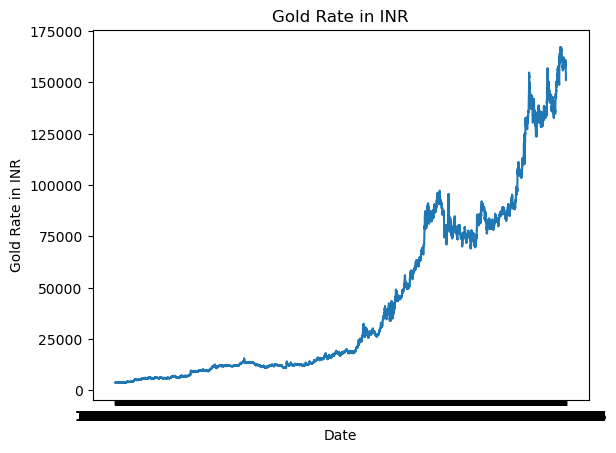

In [3]:
# map the gold rate graph for INR
plt.plot(gold_data['Date'], gold_data['INR'])
plt.xlabel('Date')
plt.ylabel('Gold Rate in INR')
plt.title('Gold Rate in INR')
plt.show()

In [4]:
# for january each year see the distribution of the highest gold rate
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

In [5]:
# how many unique years
gold_data['Year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int32)

In [6]:
# replace the month number with month name
gold_data['Month'] = gold_data['Month'].replace(
    {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
     10: 'October', 11: 'November', 12: 'December'})

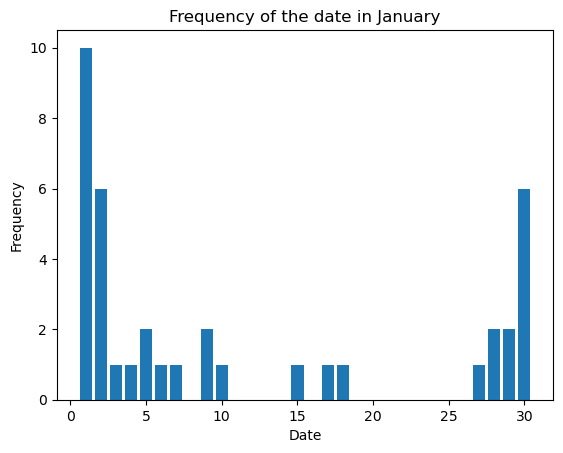

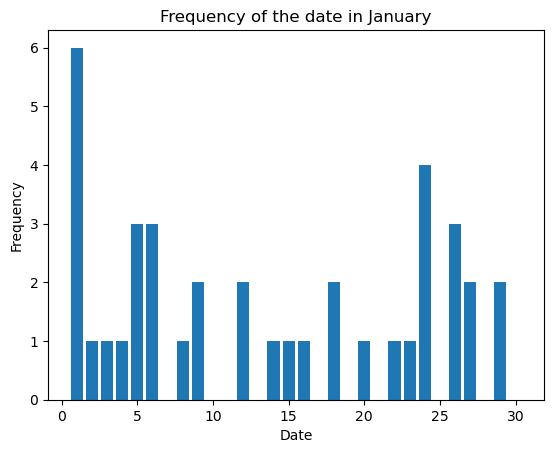

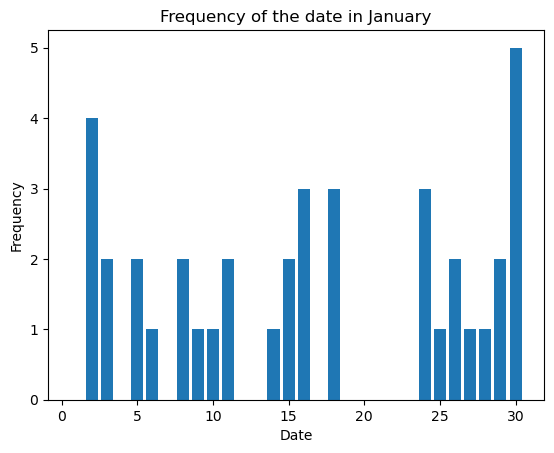

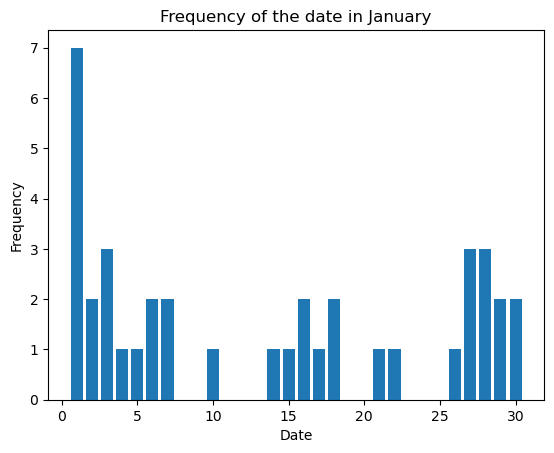

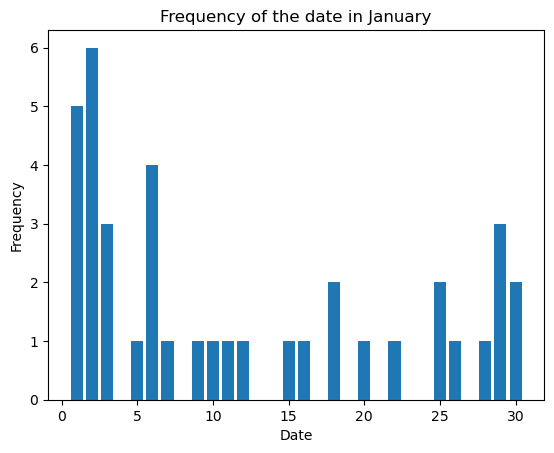

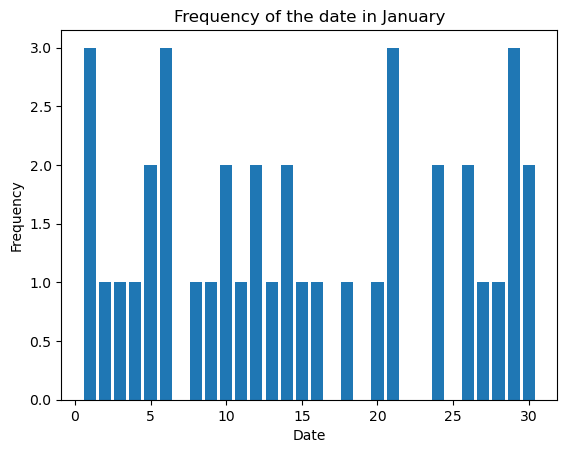

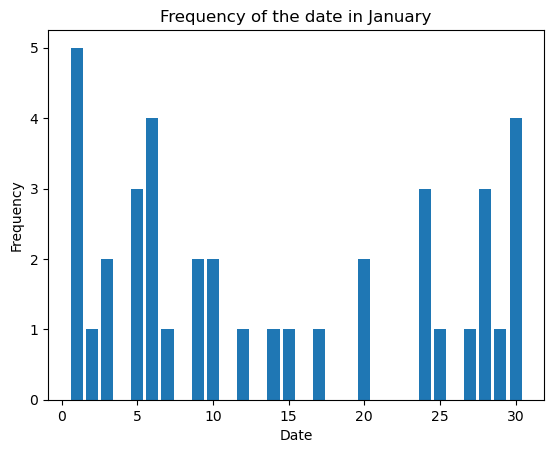

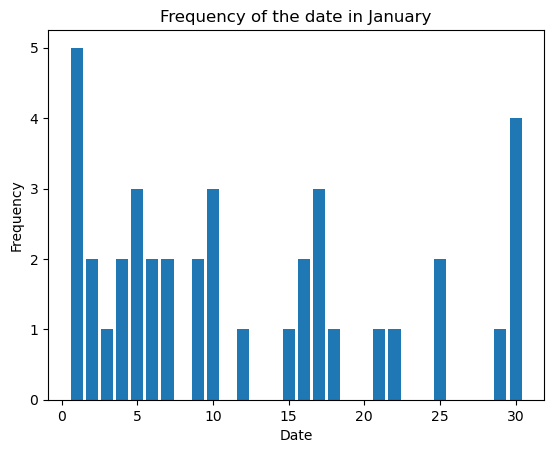

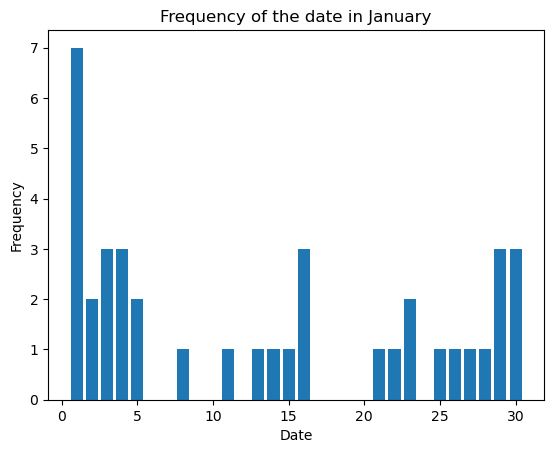

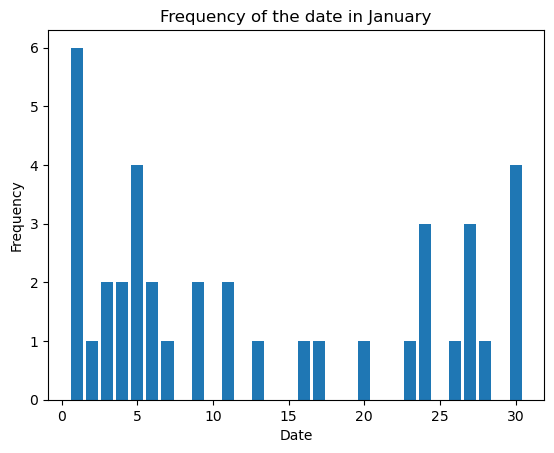

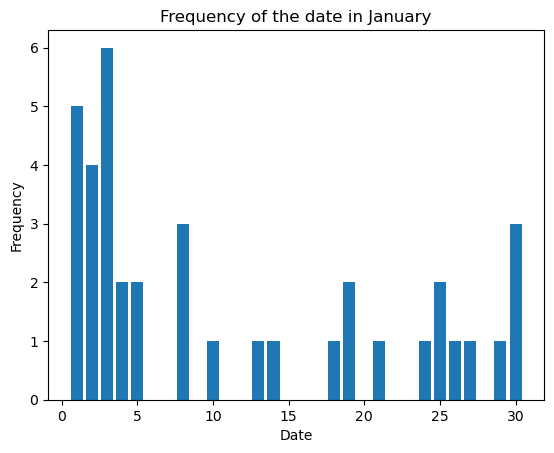

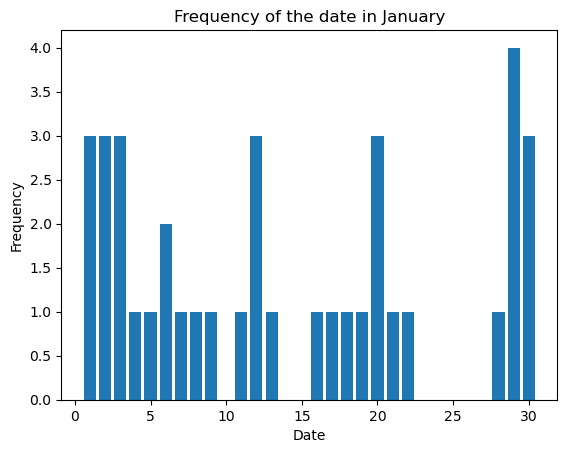

In [7]:
l = []
for month in gold_data['Month'].unique():
    month_dates = []
    for year in gold_data['Year'].unique():
        
        # filter the data for each year and month
        temp_data = gold_data[(gold_data['Year'] == year) & (gold_data['Month'] == month)]
        # find the minimum gold rate for that month
        min_gold_rate = temp_data['INR'].min()
        temp_data = temp_data[temp_data['INR'] == min_gold_rate]
        if str(min_gold_rate) == 'nan':
            continue
        #print('Year:', year, 'Month:', month, 'Min Gold Rate:', min_gold_rate, 'Date:', temp_data['Date'].values)
        #add the date to the list
        month_dates.append(int(str(temp_data['Date'].values[0])[8:10]))
        
    # plot the graph of frequencies of the dates in January_dates.
    # show all numbers from 1 to 31 on x-axis 
    plt.hist(month_dates, bins=range(1, 32), align='left', rwidth=0.8)
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.title('Frequency of the date in January')
    plt.show()
    
    #most recurring date in the month
    l.append(str('Best date in '+ month+ ' is: '+ str(max(set(month_dates), key=month_dates.count))))



In [8]:
for e in l:
    print(e)

Best date in January is: 1
Best date in February is: 1
Best date in March is: 2
Best date in April is: 1
Best date in May is: 2
Best date in June is: 1
Best date in July is: 1
Best date in August is: 1
Best date in September is: 1
Best date in October is: 1
Best date in November is: 3
Best date in December is: 29
